In [33]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

In [34]:
X,y = make_blobs(
    n_samples=250, n_features=2,
    centers=4, cluster_std=2,
    shuffle=True, random_state=0
)

In [35]:
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(250, 2)


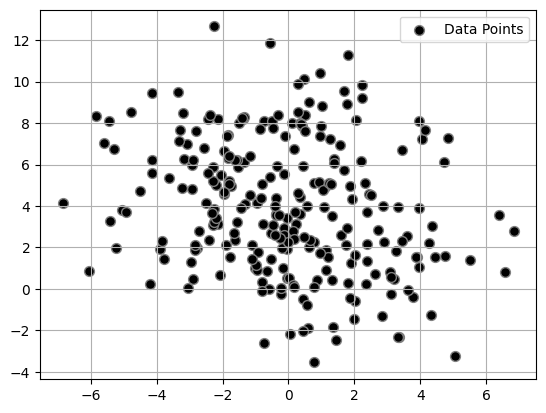

In [41]:
# 繪製原始數據點
plt.scatter(X[:, 0], X[:, 1], s=50, c='black', marker='o', edgecolor='gray', label='Data Points')

# 添加圖例和網格，然後顯示圖形
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [42]:
class KMeans:
    def __init__(self, n_clusters=4, max_iter=400, tol=1e-4):
        """
        初始化 KMeans 聚類算法。

        參數:
        n_clusters: int
            聚類中心的數量（即要形成的聚類數量）。
        max_iter: int
            最大迭代次數。
        tol: float
            聚類中心變化的容忍度，用於停止迭代條件。
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None  # 聚類中心點初始為空

    def fit_predict(self, X):
        """
        對資料 X 進行聚類。

        參數:
        X: ndarray
            形狀為 (n_samples, n_features) 的數據集，n_samples 是樣本數，n_features 是特徵數（此處為 2，代表 x 和 y 座標）。

        返回:
        ndarray
            形狀為 (n_samples,) 的陣列，表示每個樣本的聚類索引。
        """
        # 隨機選擇 n_clusters 個點作為初始聚類中心
        sample_points = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[sample_points]

        for i in range(self.max_iter):
            # 記錄當前迭代的聚類中心，用於後續比較
            old_centroids = np.copy(self.centroids)

            # 找到每個點最接近的聚類中心
            closest_cluster_ids = self.find_closest_centroids(X)

            # 更新聚類中心
            self.update_centroids(X, closest_cluster_ids)

            # 如果聚類中心變化小於設定的容忍度，則停止迭代
            if np.sum((self.centroids - old_centroids) ** 2) < self.tol:
                break

        return closest_cluster_ids

    def find_closest_centroids(self, X):
        """
        為每個點找到最接近的聚類中心。

        參數:
        X: ndarray
            數據點集合。

        返回:
        list
            包含每個點最接近的聚類中心索引的列表。
        """
        closest_centroids = []
        for point in X:
            # 計算每個點到所有聚類中心的距離
            distances = np.sqrt(np.sum((self.centroids - point) ** 2, axis=1))
            # 選擇最近的聚類中心
            closest_centroid = np.argmin(distances)
            closest_centroids.append(closest_centroid)
        return np.array(closest_centroids)

    def update_centroids(self, X, closest_cluster_ids):
        """
        更新聚類中心的位置。

        參數:
        X: ndarray
            數據點集合。
        closest_cluster_ids: ndarray
            每個點最接近的聚類中心索引。
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            # 獲取分配給當前聚類中心的所有點
            points = X[closest_cluster_ids == i]

            # 計算新的聚類中心位置
            if len(points) > 0:
                new_centroids[i] = np.mean(points, axis=0)
            else:
                # 如果沒有點分配給某個聚類中心，則重新隨機選擇一個點作為該中心
                new_centroids[i] = X[np.random.choice(len(X))]

        self.centroids = new_centroids


In [38]:
km = KMeans(n_clusters=4, max_iter=400)
# 對資料進行聚類分析並獲取分群結果
y_km = km.fit_predict(X)
print(y_km)  # 輸出分群結果

[2 1 2 2 3 0 1 3 2 2 1 2 2 2 2 0 1 0 1 3 0 1 0 2 2 0 3 2 2 3 2 1 0 3 2 0 1
 0 2 3 0 2 1 2 2 2 1 0 2 1 2 1 2 0 3 0 1 2 0 2 3 0 3 2 3 0 0 0 1 0 0 2 3 2
 2 0 0 3 2 2 0 3 3 2 1 3 1 3 3 2 3 0 0 1 2 0 2 0 2 1 2 1 1 1 2 0 3 2 2 2 3
 3 0 3 2 1 2 1 2 2 1 3 3 0 0 1 2 2 3 3 2 0 0 1 1 3 2 0 1 0 3 2 2 0 3 0 0 2
 1 2 2 3 2 1 3 2 1 0 3 3 2 2 0 0 3 0 1 3 3 0 0 2 3 2 1 0 1 1 3 1 2 3 3 3 1
 0 1 3 0 3 0 0 0 3 1 3 1 3 2 1 1 1 0 2 0 0 0 2 3 2 2 1 0 2 1 2 0 2 2 1 1 3
 2 1 1 0 2 3 1 0 1 2 1 2 0 2 0 1 1 3 2 3 0 2 3 3 3 0 2 3]


In [39]:
print("X shape:", X.shape)
print("Unique cluster labels:", set(y_km))

# 檢查是否有任何一個聚類是空的
for i in range(km.n_clusters):
    print(f"Cluster {i} size:", np.sum(y_km == i))

# 檢查質心數據
print("Centroids shape:", km.centroids.shape)
print("Centroids data:", km.centroids)


X shape: (250, 2)
Unique cluster labels: {0, 1, 2, 3}
Cluster 0 size: 62
Cluster 1 size: 54
Cluster 2 size: 78
Cluster 3 size: 56
Centroids shape: (4, 2)
Centroids data: [[ 2.59701201  0.66810077]
 [ 1.26129463  7.32238621]
 [-1.14680762  2.38865285]
 [-2.84978043  6.5135084 ]]


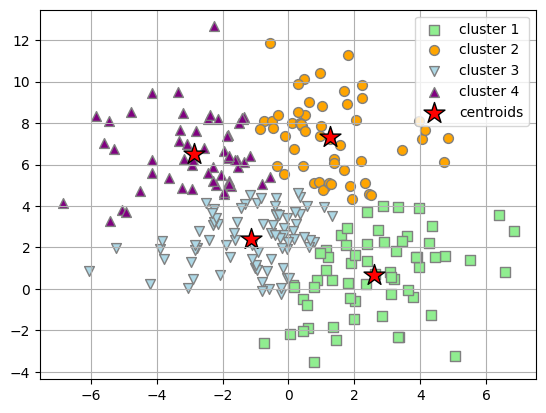

In [40]:
# 繪製每個群集的樣本
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='gray', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='gray', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='gray', label='cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s=50, c='purple', marker='^', edgecolor='gray', label='cluster 4')

# 繪製中心點
plt.scatter(km.centroids[:, 0], km.centroids[:, 1], s=250, marker='*', c='red', edgecolor='black', label='centroids')

# 添加圖例和網格，然後顯示圖形
plt.legend(scatterpoints=1)
plt.grid()
plt.show()